In [51]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

*Загружаем изображение для обработки*

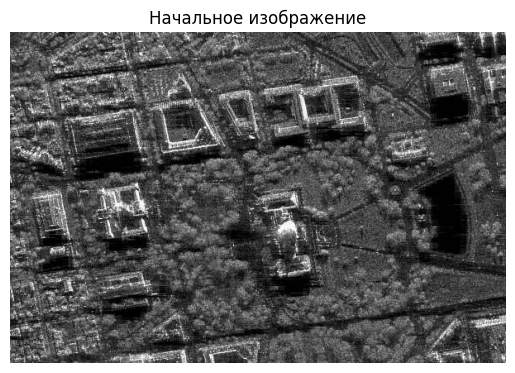

In [52]:
img = cv2.imread('sar_1_gray.jpg', cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.title('Начальное изображение')
plt.axis('off')

plt.show()

*Строим гистограмму изображения*

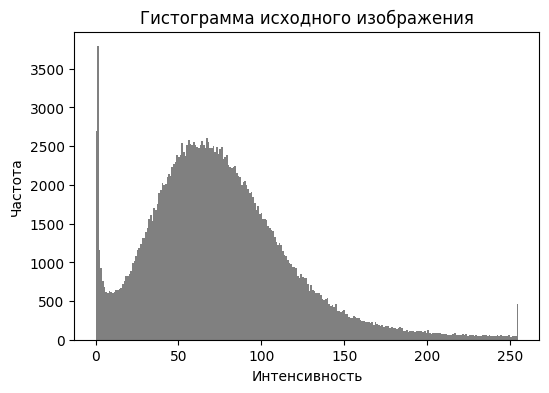

In [53]:
plt.figure(figsize=(6,4))
plt.hist(img.ravel(), bins=256, color='gray')

plt.title("Гистограмма исходного изображения")
plt.xlabel("Интенсивность")
plt.ylabel("Частота")

plt.show()

*Гамма коррекции*

In [54]:
def gamma_correction(image, gamma):
    corrected = np.power(image, gamma)
    corrected = cv2.normalize(corrected, None, 0, 1, cv2.NORM_MINMAX)
    return np.clip(corrected, 0, 1)

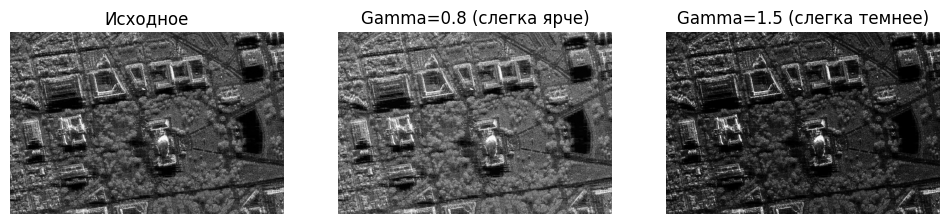

In [55]:
gamma_values = [0.8, 1.5]
imgs_gamma = {g: gamma_correction(img, g) for g in gamma_values}

plt.figure(figsize=(12,4))

plt.subplot(1,3,1);
plt.imshow(img, cmap='gray');
plt.title("Исходное");
plt.axis('off')

plt.subplot(1,3,2);
plt.imshow(imgs_gamma[0.8], cmap='gray');
plt.title("Gamma=0.8 (слегка ярче)");
plt.axis('off')

plt.subplot(1,3,3);
plt.imshow(imgs_gamma[1.5], cmap='gray');
plt.title("Gamma=1.5 (слегка темнее)");
plt.axis('off')

plt.show()

*Сравним исходное изображение и изображение скорректированное при помощи гамма-фильтра. (MSE, SSIM)*

In [56]:
def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

In [57]:
for g in gamma_values:
    mse_val = mse(img, imgs_gamma[g])
    ssim_val = ssim(img, imgs_gamma[g], data_range=1.0)
    print(f"Gamma={g}: MSE={mse_val:.6f}, SSIM={ssim_val:.6f}")

Gamma=0.8: MSE=7452.601990, SSIM=0.000182
Gamma=1.5: MSE=7482.316801, SSIM=0.000032


*Реализуем алгоритм статической коррекции*

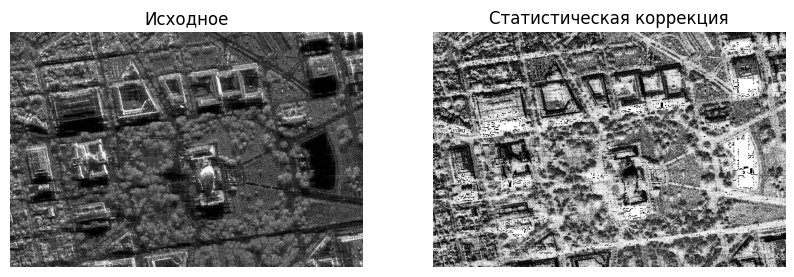

Статистическая коррекция: MSE=7470.402832, SSIM=0.006071


In [58]:
img_uint8 = (img * 255).astype(np.uint8)
eq_gray = cv2.equalizeHist(img_uint8)       # выравнивание гистограммы
eq_gray_f = eq_gray.astype(np.float32) / 255.0

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Исходное"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(eq_gray_f, cmap='gray'); plt.title("Статистическая коррекция"); plt.axis('off')
plt.show()

mse_eq = mse(img, eq_gray_f)
ssim_eq = ssim(img, eq_gray_f, data_range=1.0)
print(f"Статистическая коррекция: MSE={mse_eq:.6f}, SSIM={ssim_eq:.6f}")

*Тест агоритмов*

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

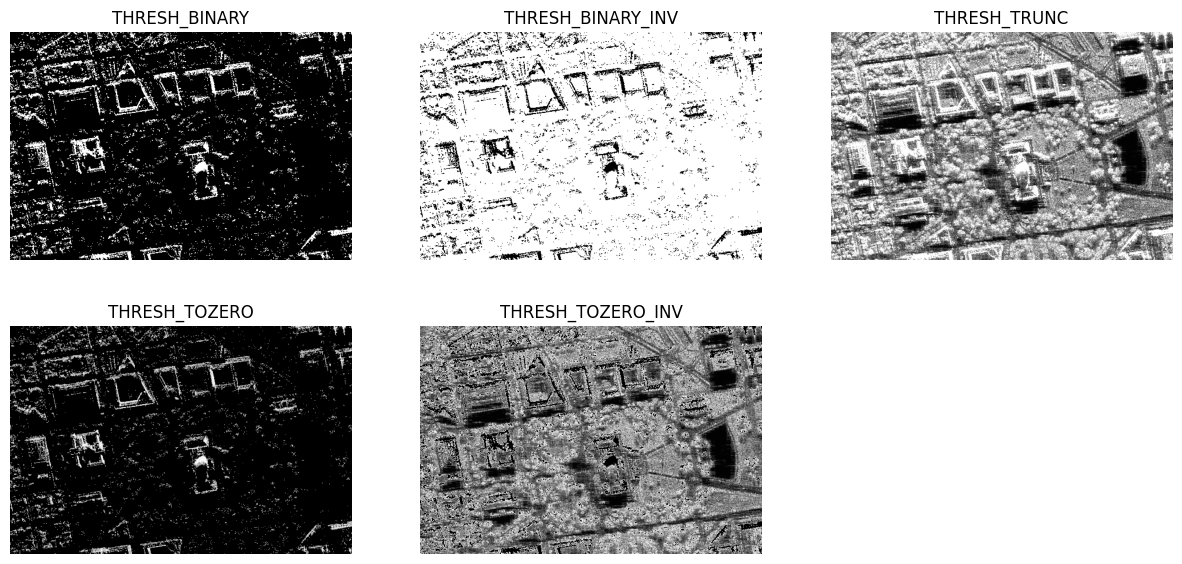

In [59]:
plt.figure(figsize=(15,7))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("THRESH_BINARY")
plt.axis('off')

_, THRESH_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.subplot(2,3,1)
plt.imshow(THRESH_1, cmap='gray')
plt.title("THRESH_BINARY")
plt.axis('off')

_, THRESH_2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
plt.subplot(2,3,2)
plt.imshow(THRESH_2, cmap='gray')
plt.title("THRESH_BINARY_INV")
plt.axis('off')

_, THRESH_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
plt.subplot(2,3,3)
plt.imshow(THRESH_3, cmap='gray')
plt.title("THRESH_TRUNC")
plt.axis('off')

_, THRESH_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
plt.subplot(2,3,4)
plt.imshow(THRESH_4, cmap='gray')
plt.title("THRESH_TOZERO")
plt.axis('off')

_, THRESH_5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
plt.subplot(2,3,5)
plt.imshow(THRESH_5, cmap='gray')
plt.title("THRESH_TOZERO_INV")
plt.axis('off')